In [79]:
import os
import numpy as np
import matplotlib.pyplot as plt
from nnfs.datasets import spiral_data
import numpy as np
import nnfs
import time
import torch
import torch.nn.functional as F

np.random.seed(42)
nnfs.init()

In [17]:
np.array([3, 2, 1, 0, -1, -2, -3])

array([ 3,  2,  1,  0, -1, -2, -3])

## Activation functions

### Step function

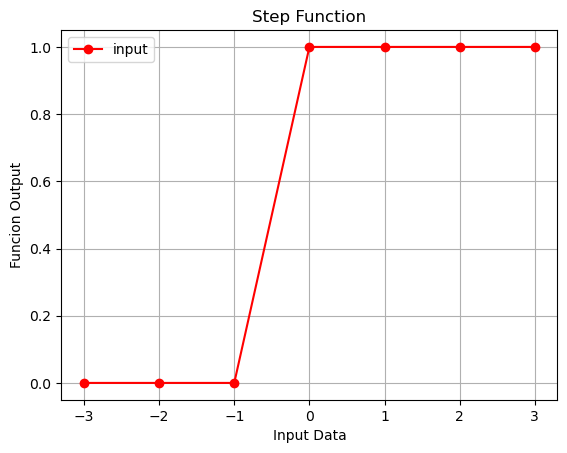

In [ ]:
def step_function(x):
    return np.where(x >= 0, 1, 0)

arr = np.array([3, 2, 1, 0, -1, -2, -3])

plt.grid(True)
plt.plot(arr, step_function(arr), 'ro-', label='input')    # 'bo--' for blue circle markers with dashed lines
# plt.plot(arr, 'bo--', label='input')
# plt.plot(step_function(np.array([3, 2, 1, 0, -1, -2, -3])), 'ro-', label='step function')
plt.legend()
plt.xlabel('Input Data')
plt.ylabel('Funcion Output')
plt.xticks(np.arange(-3, 4, 1))
plt.title('Step Function')
plt.show()


# step_function(np.array([3, 2, 1, 0, -1, -2, -3]))



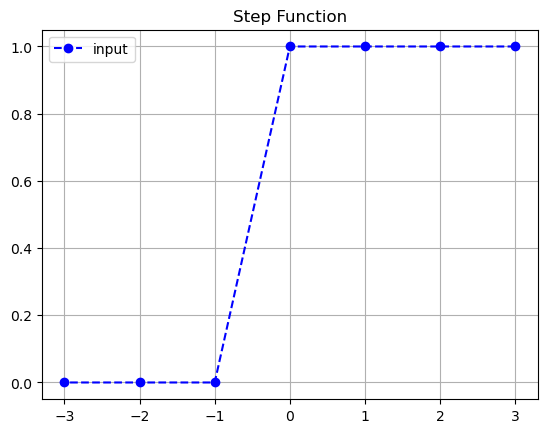

In [37]:
def step_function(x):
    return np.where(x >= 0, 1, 0)


arr = np.array([3, 2, 1, 0, -1, -2, -3])

plt.grid(True)
plt.plot(arr, step_function(arr), 'bo--', label='input')    
# plt.plot(arr, 'bo--', label='input')
# plt.plot(step_function(np.array([3, 2, 1, 0, -1, -2, -3])), 'ro-', label='step function')
plt.legend()
# plt.plot(arr, 'bo--', label='data', linewidth=2, markersize=10, markerfacecolor='red', markeredgewidth=2, markeredgecolor='blue')
# plt.xlabel('X-axis')
# plt.ylabel('Y-axis')
plt.title('Step Function')
plt.show()


# step_function(np.array([3, 2, 1, 0, -1, -2, -3]))



#### Sample forward pass in 1 Neuron

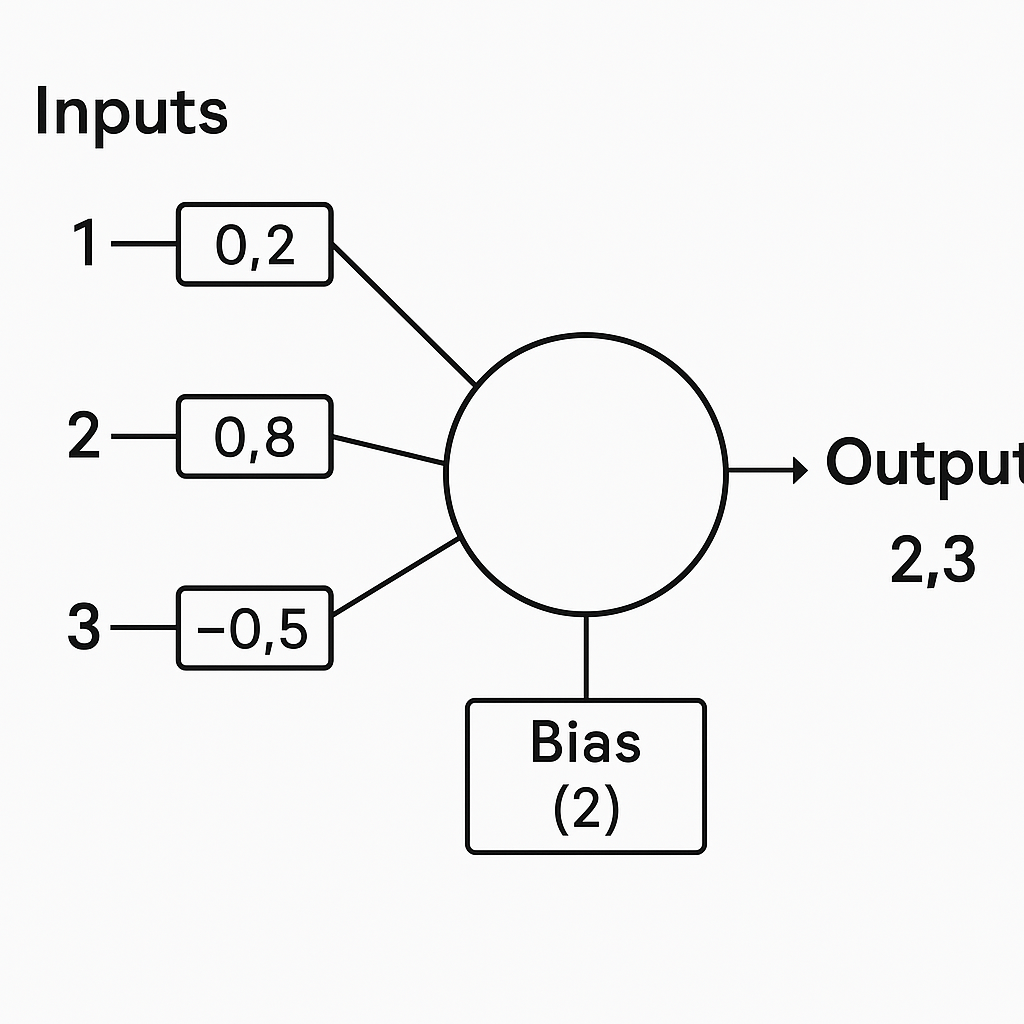

In [42]:
inputs = np.array([1,2,3])
weights = np.array([0.2, 0.8, -0.5])
bias = 2

output = np.dot(inputs, weights) + bias
print(output)

2.3


In [ ]:
inputs = np.array([1,2,3])
weights = np.array([0.2, 0.8, -0.5])
bias = 2

output = inputs @ weights + bias
print(output)

2.3


In [46]:
output = inputs[0] * weights[0] + inputs[1] * weights[1] + inputs[2] * weights[2] + bias
print(output)

2.3


In [47]:
inputs = np.array([1,2,3,2.5])
weights = np.array([0.2, 0.8, -0.5, 1])
bias = 2

output = inputs @ weights + bias
print(output)

4.8


#### Sample forward pass in 3 Neurons

Para cada neurona, necesitas su propio vector de pesos y su propio sesgo. En este caso, tenemos 3 neuronas, por lo que necesitamos 3 vectores de pesos y 3 sesgos.

In [57]:
inputs = np.array([1,2,3,2.5])
weights1 = np.array([0.2, 0.8, -0.5, 1])
weights2 = np.array([0.5, -0.91, 0.26, -0.5])
weights3 = np.array([-0.26, -0.27, 0.17, 0.87])

bias1 = 2
bias2 = 3
bias3 = 0.5

output1 = inputs @ weights1 + bias1 # First neuron
output2 = inputs @ weights2 + bias2 # Second neuron
output3 = inputs @ weights3 + bias3 # Third neuron

outputs = np.array([output1, output2, output3]) # Stack the outputs into a single array
print('Output array:', outputs)
print()
print('Output1:',output1, 'Output2:', output2, 'Output3:', output3)

Output array: [4.8   1.21  2.385]

Output1: 4.8 Output2: 1.21 Output3: 2.385


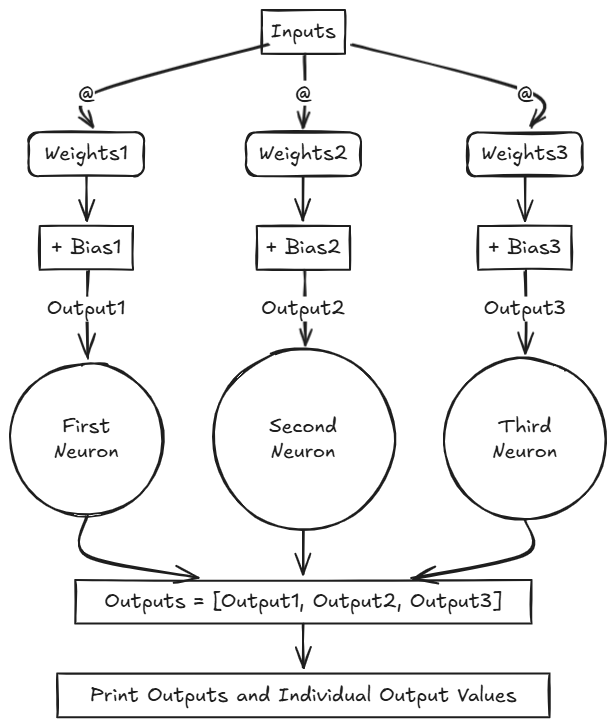

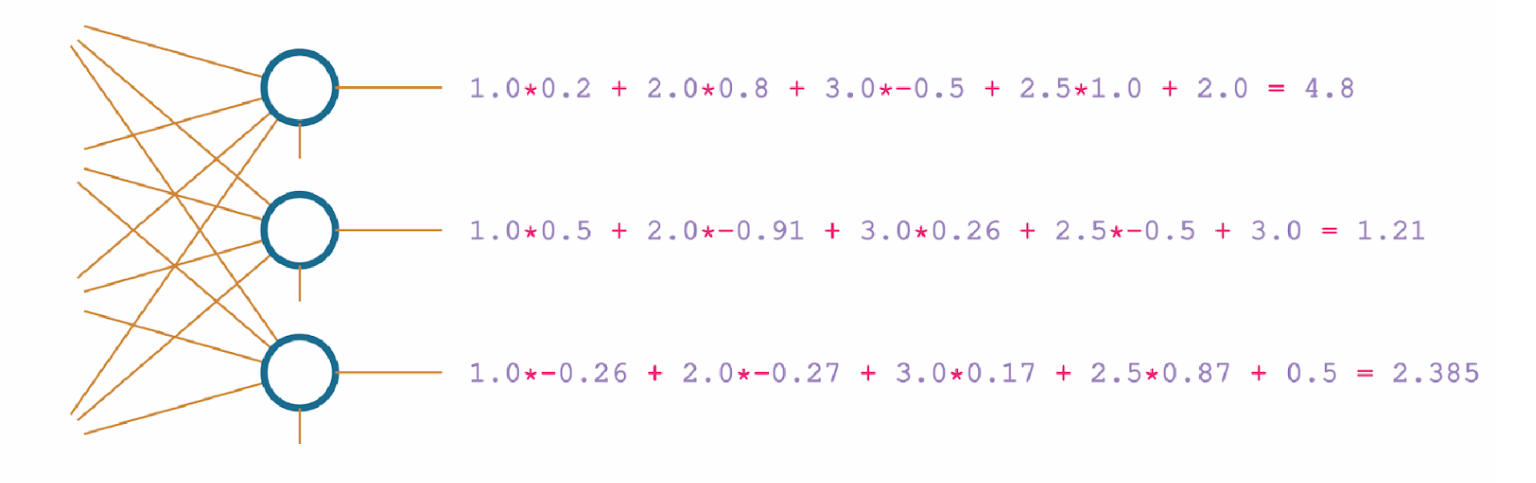

In [59]:
inputs = np.array([1, 2, 3, 2.5])

weights = [
    np.array([0.2, 0.8, -0.5, 1]),
    np.array([0.5, -0.91, 0.26, -0.5]),
    np.array([-0.26, -0.27, 0.17, 0.87])
]

biases = [2, 3, 0.5]

outputs = []
for w, b in zip(weights, biases):
    outputs.append(inputs @ w + b)

outputs = np.array(outputs)  # Convert to numpy array
print('Output array:', outputs)
for i, output in enumerate(outputs, 1):
    print(f'Output{i}:', output)

Output array: [4.8   1.21  2.385]
Output1: 4.8
Output2: 1.21
Output3: 2.385


In [ ]:
# arr = np.array([1, 2, 3, 4, 5])
# # Returns array of elements: >3 become 10, others stay same
# result = np.where(arr > 3, 10, arr)
# # result: [1, 2, 3, 10, 10]

# # Find indices where elements are > 3
# indices = np.where(arr > 3)
# # indices: (array([3, 4]),)

In [73]:
sample_arr = np.array([1, 2, 3, 4, 5])
print("1.sample_arr:\n\n", sample_arr, '\n\n', sample_arr.shape, sample_arr.ndim, sample_arr.dtype)
sample_matrix_3d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("\n2.sample_matrix_3x3:\n\n", sample_matrix_3d, '\n\n', sample_matrix_3d.shape, sample_arr.ndim, sample_arr.dtype)
sample_matrix_2d = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
print("\n3.sample_matrix_4x2:\n\n", sample_matrix_2d, '\n\n', sample_matrix_2d.shape, sample_arr.ndim, sample_arr.dtype)

1.sample_arr:

 [1 2 3 4 5] 

 (5,) 1 int32

2.sample_matrix_3x3:

 [[1 2 3]
 [4 5 6]
 [7 8 9]] 

 (3, 3) 1 int32

3.sample_matrix_4x2:

 [[1 2]
 [3 4]
 [5 6]
 [7 8]] 

 (4, 2) 1 int32


In [ ]:
# 2 dimensional array made of 2 3 dimensional arrays
sample_matrix_3d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr = np.array([sample_matrix_3d, sample_matrix_3d])

In [ ]:
# A tensor is a multi-dimensional array, and the number of dimensions is called the rank of the tensor.
# The rank of a tensor is the number of dimensions it has.b
# For example, a 1D tensor is a vector, a 2D tensor is a matrix, and a 3D tensor is a cube.

A tensor is a multi-dimensional array, and the number of dimensions is called the rank of the tensor.
The rank of a tensor is the number of dimensions it has.

**Its just and object that can be represented as an array**

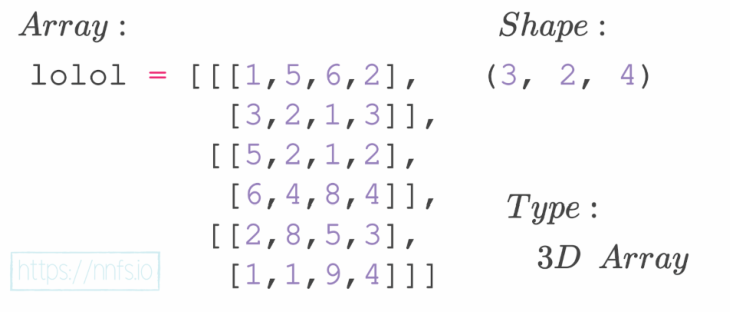

In [ ]:
arr.shape, arr.ndim, arr.dtype, arr.size, arr.itemsize, arr.nbytes, arr.dat


((2, 3, 3), 3, dtype('int32'), 18, 4, 72, <memory at 0x000001E04FD0E4D0>)

In [95]:
arr, arr[0][1], arr[1][0], arr[1][0][2]

(array([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],
 
        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]]),
 array([4, 5, 6]),
 array([1, 2, 3]),
 3)

In [103]:
sample_matrix_3d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr = np.array([sample_matrix_3d, sample_matrix_3d])

a, b = arr[0][1], arr[1][0]

print("a:", a)
print("b:", b)

print("Sum of a and b:", a + b)

print("Dot product of a and b:", a @ b)

a: [4 5 6]
b: [1 2 3]
Sum of a and b: [5 7 9]
Dot product of a and b: 32


Data batches

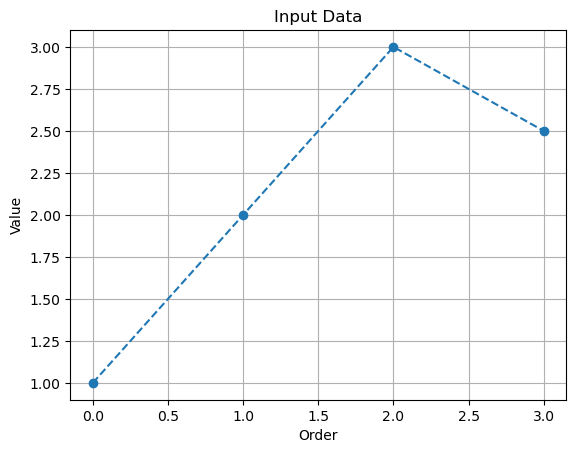

In [114]:
plt.plot(inputs, '--o', label='Input Data')
plt.title('Input Data')
plt.xlabel('Order')
plt.ylabel('Value')
plt.grid(True)
plt.show()

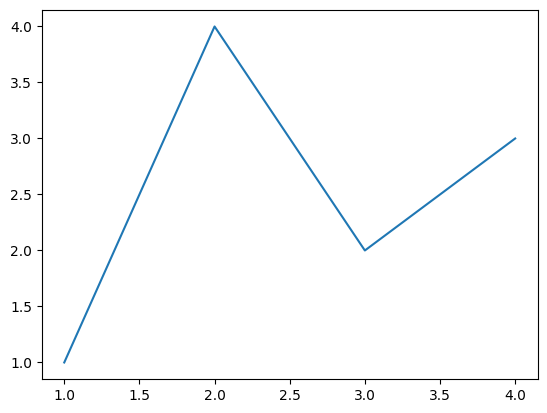

In [8]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4], [1, 4, 2, 3])
plt.show()

In [10]:
# Generate synthetic data for testing
np.random.seed(42)
X = np.random.randn(2, 100)  # 2 features, 100 samples
Y = np.random.randint(0, 2, (1, 100))  # Binary classification

In [7]:
    # Define network architecture
layer_dims = [2, 3, 1]  # Input layer: 2, Hidden layer: 3, Output layer: 1

In [ ]:
def train(X, Y, layer_dims, epochs, lr):
    params = init_params(layer_dims)
    cost_history = []

    for i in range(epochs):
        Y_hat, caches = forward_prop(X, params)
        cost = cost_function(Y_hat, Y)
        cost_history.append(cost)
        grads = backprop(Y_hat, Y, caches)
        params = update_parameters(params, grads, lr)

    return params, cost_history

In [ ]:
# Train the network
params, cost_history = train(X, Y, layer_dims, epochs=1000, lr=0.01)

In [13]:
init_params([3])

{}

In [3]:
def init_params(layer_dims):
    np.random.seed(3)
    params = {}
    L = len(layer_dims)
    for l in range(1, L):
        params['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        params['b' + str(l)] = np.zeros((layer_dims[l], 1))
    return params

In [4]:
def sigmoid(Z):
    A = 1 / (1 + np.exp(-Z))
    cache = Z
    return A, cache

In [5]:
def forward_prop(X, params):
    A = X
    caches = []
    L = len(params) // 2
    for l in range(1, L + 1):
        A_prev = A
        Z = np.dot(params['W' + str(l)], A_prev) + params['b' + str(l)]
        A, activation_cache = sigmoid(Z)
        cache = ((A_prev, params['W' + str(l)], params['b' + str(l)]), activation_cache)
        caches.append(cache)
    return A, caches

In [6]:
def cost_function(A, Y):
    m = Y.shape[1]
    cost = (-1/m) * (np.dot(np.log(A), Y.T) + np.dot(np.log(1 - A), (1 - Y).T))
    return cost

In [7]:
def one_layer_backward(dA, cache):
    linear_cache, activation_cache = cache
    Z = activation_cache
    dZ = dA * sigmoid(Z)[0] * (1 - sigmoid(Z)[0])
    A_prev, W, b = linear_cache
    m = A_prev.shape[1]

    dW = (1/m) * np.dot(dZ, A_prev.T)
    db = (1/m) * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)

    return dA_prev, dW, db

In [8]:
def backprop(AL, Y, caches):
    grads = {}
    L = len(caches)
    m = AL.shape[1]

    dAL = -(np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

    current_cache = caches[L - 1]
    grads["dA" + str(L - 1)], grads["dW" + str(L - 1)], grads["db" + str(L - 1)] = one_layer_backward(dAL, current_cache)

    for l in reversed(range(L - 1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = one_layer_backward(grads["dA" + str(l + 1)], current_cache)
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l)] = dW_temp
        grads["db" + str(l)] = db_temp

    return grads

In [9]:
def update_parameters(params, grads, learning_rate):
    L = len(params) // 2
    for l in range(L):
        params["W" + str(l + 1)] -= learning_rate * grads["dW" + str(l + 1)]
        params["b" + str(l + 1)] -= learning_rate * grads["db" + str(l + 1)]
    return params

In [10]:
def train(X, Y, layer_dims, epochs, lr):
    params = init_params(layer_dims)
    cost_history = []

    for i in range(epochs):
        Y_hat, caches = forward_prop(X, params)
        cost = cost_function(Y_hat, Y)
        cost_history.append(cost)
        grads = backprop(Y_hat, Y, caches)
        params = update_parameters(params, grads, lr)

    return params, cost_history

In [11]:
# init_params(3)

In [5]:
matriz = np.array([[1, 2, 3], [4, 5, 6]])

print("Matriz original:\n", matriz)
print("Matriz transpuesta:\n", matriz.T)  # Transpose the matrix
# matriz.transpose()  # Transpose the matrix

Matriz original:
 [[1 2 3]
 [4 5 6]]
Matriz transpuesta:
 [[1 4]
 [2 5]
 [3 6]]


In [6]:
matriz = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])

print("Matriz original:\n", matriz)
print("Matriz transpuesta:\n", matriz.T)  # Transpose the matrix
# matriz.transpose()  # Transpose the matrix

Matriz original:
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
Matriz transpuesta:
 [[ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]
 [ 4  8 12]]


np.expand_dim

Expand the shape of an array.

Insert a new axis that will appear at the axis position in the expanded array shape.

In [10]:
# Examples
x = np.array([1, 2])
print('x:', x)
print('shape:', x.shape)

x: [1 2]
shape: (2,)


In [11]:
# The following is equivalent to x[np.newaxis, :] or x[np.newaxis]:
y = np.expand_dims(x, axis=0)
print('y:', y)
print('shape:', y.shape)

y: [[1 2]]
shape: (1, 2)


In [ ]:
# The following is equivalent to x[:, np.newaxis]:
y = np.expand_dims(x, axis=1)

# Realmente es como hacer x.reshape(2, 1), es decir, cambiar la forma de x a 2 filas y 1 columna o dicho de otra forma, hacer la transpuesta de x
print('y:', y)
print('shape:', y.shape)

y: [[1]
 [2]]
shape: (2, 1)


In [19]:
# x.reshape(2, 1)  # Reshape x to 2 rows and 1 column
print('reshape (2, 1):', x.reshape(2, 1))
# x.reshape(1, 2)  # Reshape x to 1 row and 2 columns
print('\nreshape (1, 2):', x.reshape(1,2))

reshape (2, 1): [[1]
 [2]]

reshape (1, 2): [[1 2]]


In [22]:
# axis may also be a tuple:
y = np.expand_dims(x, axis=(0, 1))
print('y:', y)
print('shape:', y.shape)

y: [[[1 2]]]
shape: (1, 1, 2)


In [ ]:
# axis may also be a tuple:
y = np.expand_dims(x, axis=(0, 2))

# Se convierte x en un vector de 3 dimensiones, es decir, un array de 1x2x1
print('y:', y)
print('shape:', y.shape)

y: [[[1]
  [2]]]
shape: (1, 2, 1)


In [37]:
print('x:', x)
print('y:', y)
print(y[0][0], y[0][0][0])
print(y[0][1], y[0][1][0])

x: [1 2]
y: [[[1]
  [2]]]
[1] 1
[2] 2


In [41]:
x

array([1, 2])

In [46]:
np.concatenate((x, [1]))

array([1, 2, 1])

In [51]:
# axis may also be a tuple:
y = np.expand_dims([x] , axis=(0, 3))

# Se convierte x en un vector de 3 dimensiones, es decir, un array de 1x2x1
print('y:', y)
print('shape:', y.shape)

y: [[[[1]
   [2]]]]
shape: (1, 1, 2, 1)


In [58]:
x, x.shape, x.ndim, np.array([x]), np.array([x]).shape, np.array([x]).ndim, 

(array([1, 2]), (2,), 1, array([[1, 2]]), (1, 2), 2)

In [54]:
# axis may also be a tuple:
y = np.expand_dims([x] , axis=(3, 0))

# Se convierte x en un vector de 3 dimensiones, es decir, un array de 1x2x1
print('y:', y)
print('shape:', y.shape)

y: [[[[1]
   [2]]]]
shape: (1, 1, 2, 1)


In [53]:
# axis may also be a tuple:
y = np.expand_dims([x] , axis=(2, 1))

# Se convierte x en un vector de 3 dimensiones, es decir, un array de 1x2x1
print('y:', y)
print('shape:', y.shape)

y: [[[[1 2]]]]
shape: (1, 1, 1, 2)


In [59]:
# axis may also be a tuple:
y = np.expand_dims([x] , axis=(1, 2))

# Se convierte x en un vector de 3 dimensiones, es decir, un array de 1x2x1
print('y:', y)
print('shape:', y.shape)

y: [[[[1 2]]]]
shape: (1, 1, 1, 2)


In [60]:
# axis may also be a tuple:
y = np.expand_dims(x, axis=(0, 2, 1))
print('y:', y)
print('shape:', y.shape)

y: [[[[1 2]]]]
shape: (1, 1, 1, 2)


In [71]:
x, x[None,:], x[:, None], np.expand_dims(x, axis=1), np.expand_dims(x, axis=0)

(array([1, 2]),
 array([[1, 2]]),
 array([[1],
        [2]]),
 array([[1],
        [2]]),
 array([[1, 2]]))

In [75]:
x[:,None]

array([[1],
       [2]])

In [ ]:
a = [1, 2, 3]
b = [2, 3, 4]

a, b = np.array(a), np.array(b)

# Element-wise multiplication and dot product
a * b.T, a @ b

(array([ 2,  6, 12]), 20)

In [81]:
# Create inputs array - 3 samples with 4 features each
inputs = np.array([
    [1.0, 2.0, 3.0, 2.5],
    [2.0, 5.0, -1.0, 2.0],
    [-1.5, 2.7, 3.3, -0.8]
])

# Create weights array - 3 sets of weights with 4 weights each
weights = np.array([
    [0.2, 0.8, -0.5, 1.0],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
])

print('Inputs shape:', inputs.shape)  # (3, 4)
print('Weights shape:', weights.shape)  # (3, 4)

Inputs shape: (3, 4)
Weights shape: (3, 4)


Necesitas trasponer uno de los dos por narices para poder llevar a cabo la multiplicacion en la red neuronal. Que vas a trasponer? El input o los pesos?

In [83]:
inputs @ weights.T, (inputs @ weights.T).shape

(array([[ 2.8  , -1.79 ,  1.885],
        [ 6.9  , -4.81 , -0.3  ],
        [-0.59 , -1.949, -0.474]]),
 (3, 3))

In [84]:
inputs.T @ weights, (inputs.T @ weights).shape

(array([[ 1.59 , -0.615, -0.235, -1.305],
        [ 2.198, -3.679,  0.759,  1.849],
        [-0.758,  2.419, -1.199,  6.371],
        [ 1.708,  0.396, -0.866,  0.804]]),
 (4, 4))

Según como hagas la traspuesta acabas con una matriz de 3x3 o de 4x4.

La red neuronal es de 3. Así que sí, lo que se transpone es la matriz de weights

In [86]:
biases = np.array([2.0, 3.0, 0.5])
print('Biases shape:', biases.shape)  # (3,)
print('Biases:', biases)

outputs = inputs @ weights.T + biases
print('\nOutputs shape:', outputs.shape)  # (3, 3)
print('Outputs:', outputs)

Biases shape: (3,)
Biases: [2.  3.  0.5]

Outputs shape: (3, 3)
Outputs: [[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]


In [ ]:
# Create inputs array - 3 samples with 4 features each
inputs = np.array([
    [1.0, 2.0, 3.0, 2.5],
    [2.0, 5.0, -1.0, 2.0],
    [-1.5, 2.7, 3.3, -0.8]
])

# Create weights array - 3 sets of weights with 4 weights each
weights = np.array([
    [0.2, 0.8, -0.5, 1.0],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
])

biases = np.array([2.0, 3.0, 0.5])

# print('Inputs shape:', inputs.shape)  # (3, 4)
# print('Weights shape:', weights.shape)  # (3, 4)

biases = np.array([2.0, 3.0, 0.5])
print('Biases shape:', biases.shape)  # (3,)
print('Biases:', biases)

outputs = inputs @ weights.T + biases
print('\nOutputs shape:', outputs.shape)  # (3, 3)
print('Outputs:', outputs)

Inputs shape: (3, 4)
Weights shape: (3, 4)


Each of those 3 unique weight sets is associated with its distinct neuron. Thus, since we have 3
weight sets, we have 3 neurons in this first hidden layer. Each neuron has a unique set of weights,
of which we have 4 (as there are 4 inputs to this layer), which is why our initial weights have a
shape of ​(3,4)​.

We get 3 neurons for a 3 samples that are vectors with sample size = 4.

Therefore, we get the initial weights shape with the form (3,4)

In [3]:
from nnfs.datasets import spiral_data
import numpy as np
import nnfs

nnfs.init()

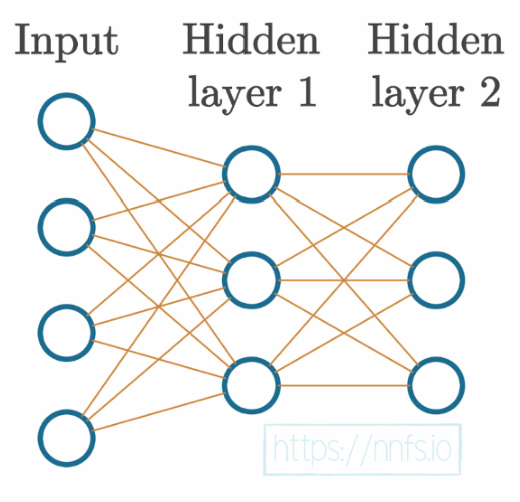

In [64]:
# 4 inputs es decir 4 muestras, cada una de dimension 3. Por ejemplo puede ser un codigo de colores RGB y nos han pasado 4 colores codificados así.
inputs = np.array([[1, 2, 3, 2.5], [2., 5., -1., 2], [-1.5, 2.7, 3.3, -0.8]])

# 3 neuronas, reciben 4 inputs de dimensión 3
weights = np.array([[0.2, 0.8, -0.5, 1],
[0.5, -0.91, 0.26, -0.5],
[-0.26, -0.27, 0.17, 0.87]])
biases = np.array([2, 3, 0.5])

# 3 neuronas, reciben 3 inputs de dimensión 3
weights2 = np.array([[0.1, -0.14, 0.5],
[-0.5, 0.12, -0.33],
[-0.44, 0.73, -0.13]])
biases2 = np.array([-1, 2, -0.5])

# 1 Neurona, recibe 1 input de dimensión 3
weights3 = np.array([[.2, -.2, -.2]])

# weights3 = np.array([[0.2],
# [-0.2],
# [-0.2]])

biases3 = np.array([4, 5, 2])
# layer1_outputs = np.dot(inputs, np.array(weights).T) + biases
# layer2_outputs = np.dot(layer1_outputs, np.array(weights2).T) + biases2
# print(layer2_outputs)

In [66]:
l1_outputs = inputs @ weights.T + biases
print('l1_outputs:', l1_outputs)

# Cada una de las 3 neuronas genera un output de dimension 3 tambien (como el input)
l2_outputs = l1_outputs @ weights2.T + biases2
print('\nl2_outputs:', l2_outputs)

# Cada una de las 3 neuronas genera un output de dimension 3 tambien (como el input)
l3_outputs = l2_outputs @ weights3.T + biases3
print('\nl3_outputs:', l3_outputs)

l1_outputs: [[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]

l2_outputs: [[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]

l3_outputs: [[4.71674  5.71674  2.71674 ]
 [5.74798  6.74798  3.74798 ]
 [3.590174 4.590174 1.590174]]


In [67]:
l2_outputs.shape, weights3.T.shape

((3, 3), (3, 1))

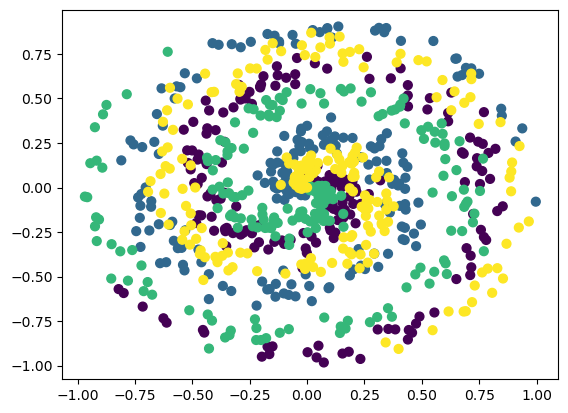

In [69]:
import matplotlib.pyplot as plt
X, y = spiral_data(samples=200, classes=4)

# plt.grid()
plt.scatter(X[:,0],X[:,1], c=y, s=40, cmap='viridis')
# plt.legend()
plt.show()

In [ ]:
# Define activation functions as a dictionary for better modularity
activation_functions = {
    "linear": lambda x: x,
    "relu": lambda x: np.maximum(0, x),
    "sigmoid": lambda x: 1 / (1 + np.exp(-x)),
    "tanh": lambda x: np.tanh(x),
    "softmax": lambda x: np.exp(x - np.max(x, axis=1, keepdims=True)) / np.sum(np.exp(x - np.max(x, axis=1, keepdims=True)), axis=1, keepdims=True)
}

In [145]:
# Set a random seed for reproducibility
np.random.seed

42

### Neural Net Layer Definition

- Se define una función de activacion para cada capa

In [60]:
# Updated Layer_Dense class with activation function support
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons, activation=None):
        """
        Initialize weights, biases, and activation function for the layer.
        :param n_inputs: Number of inputs to the layer
        :param n_neurons: Number of neurons in the layer
        :param activation: Activation function (e.g., relu, sigmoid, tanh, softmax)
        """
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        self.activation = activation

    def forward_prop(self, inputs):
        """
        Perform the forward pass for the layer.
        :param inputs: Input data
        """
        self.output_raw = inputs @ self.weights + self.biases
        self.output = self.activation(self.output_raw) if self.activation else self.output_raw

### Activation functions

In [38]:
# Activation functions
# Define activation functions as a dictionary for better modularity
activation_functions = {
    "linear": lambda x: x,
    "relu": lambda x: np.maximum(0, x),
    "sigmoid": lambda x: 1 / (1 + np.exp(-x)),
    "tanh": lambda x: np.tanh(x),
    "softmax": lambda x: np.exp(x - np.max(x, axis=1, keepdims=True)) / np.sum(np.exp(x - np.max(x, axis=1, keepdims=True)), axis=1, keepdims=True)
}

In [19]:
# Load dataset
X, y = spiral_data(samples=100, classes=3)

In [20]:
# Create ReLU activation (to be used with Dense layer):
relu = activation_functions["relu"]
relu(-4), relu(-1), relu(0), relu(3)

(0, 0, 0, 3)

In [39]:
# Create different initial layers: Wout activation function, relu and linear.
dense1_none = Layer_Dense(2, 3)
dense1_relu = Layer_Dense(2, 3, activation=activation_functions["relu"])
dense1_linear = Layer_Dense(2, 3, activation=activation_functions["linear"])

In [42]:
print('Wout activation function:')
print('Biases shape:', dense1_none.biases.shape)  # (3,)
print('Biases:', dense1_none.biases)
print('Weights shape:', dense1_none.weights.shape)
print('Weights:', dense1_none.weights)

Wout activation function:
Biases shape: (1, 3)
Biases: [[0. 0. 0.]]
Weights shape: (2, 3)
Weights: [[-0.01755891  0.00450934 -0.00684011]
 [ 0.01659551  0.01068509 -0.00453386]]


In [43]:
print('With relu activation function:')
print('Biases shape:', dense1_relu.biases.shape)  # (3,)
print('Biases:', dense1_relu.biases)
print('Weights shape:', dense1_relu.weights.shape)
print('Weights:', dense1_relu.weights)

With relu activation function:
Biases shape: (1, 3)
Biases: [[0. 0. 0.]]
Weights shape: (2, 3)
Weights: [[-0.00687838 -0.01214077 -0.00440923]
 [-0.00280355 -0.00364694  0.00156704]]


In [53]:
print('With linear activation function:')
print('Biases shape:', dense1_linear.biases.shape)  # (3,)
print('Biases:', dense1_linear.biases)
print('Weights shape:', dense1_linear.weights.shape)
print('Weights:', dense1_linear.weights)

With linear activation function:
Biases shape: (1, 3)
Biases: [[0. 0. 0.]]
Weights shape: (2, 3)
Weights: [[ 0.00578521  0.00349654 -0.00764144]
 [-0.01437791  0.01364532 -0.00689449]]


In [25]:
X[:5]

array([[0.        , 0.        ],
       [0.00299556, 0.00964661],
       [0.01288097, 0.01556285],
       [0.02997479, 0.0044481 ],
       [0.03931246, 0.00932828]], dtype=float32)

In [54]:
dense1_none.forward_prop(X)
dense1_relu.forward_prop(X)
dense1_linear.forward_prop(X)

In [ ]:
print("Without activation function:")
print("Output_raw:\n", dense1_none.output_raw[:3])
print("Output:\n", dense1_none.output[:3])

Without activation function:
Output_raw:
 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.07491651e-04  1.16582894e-04 -6.42262821e-05]
 [ 3.20976105e-05  2.24375224e-04 -1.58666982e-04]]
Output:
 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.07491651e-04  1.16582894e-04 -6.42262821e-05]
 [ 3.20976105e-05  2.24375224e-04 -1.58666982e-04]]


In [59]:
# Es lo mismo que no poner ninguna funcion de activacion
print("With linear activation function:")
print("Output_raw:\n", dense1_linear.output_raw[:3])
print("Output:\n", dense1_linear.output[:3])

With linear activation function:
Output_raw:
 [[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-1.2136816e-04  1.4210514e-04 -8.9398818e-05]
 [-1.4924211e-04  2.5739890e-04 -2.0572708e-04]]
Output:
 [[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-1.2136816e-04  1.4210514e-04 -8.9398818e-05]
 [-1.4924211e-04  2.5739890e-04 -2.0572708e-04]]


In [56]:
print("With relu activation function:")
print("Output_raw:\n", dense1_relu.output_raw[:3])
print("Output:\n", dense1_relu.output[:3])

With relu activation function:
Output_raw:
 [[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-4.7649359e-05 -7.1548930e-05  1.9085182e-06]
 [-1.3223145e-04 -2.1314164e-04 -3.2407526e-05]]
Output:
 [[0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.9085182e-06]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]]


### Softmax Explanation

The softmax function transforms a vector of real numbers into a probability distribution. The formula shown in the image is:

$$S_{i,j} = \frac{e^{z_{i,j}}}{\sum_{l=1}^{L} e^{z_{i,l}}}$$

Where:
- $S_{i,j}$ is the softmax output for element $j$ in sample $i$
- $z_{i,j}$ is the input value at position $j$ for sample $i$
- $L$ is the total number of classes/elements
- The denominator sums the exponential of all elements in the same sample

The softmax function has two key properties:
1. It converts values to the range (0,1)
2. The sum of all outputs equals 1, creating a valid probability distribution

This makes softmax ideal for multi-class classification problems, where the output represents the probability of each class.

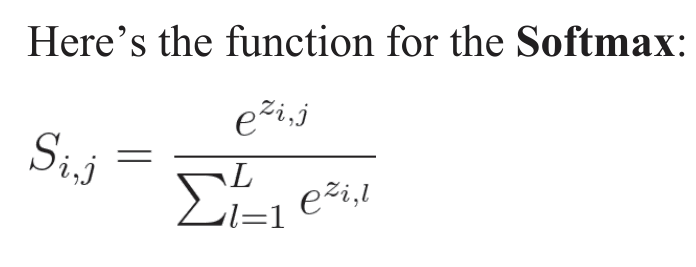

In [ ]:
# axis=0. This means to sum row-wise, along axis 0.

In [88]:
# Softmax activation function test

example_outputs = [4.8, 1.21, 2.385]

# def exponential(x):
    # return np.exp(x)

exponential = lambda x: np.exp(x)  # Exponential function

example_outputs_exp = exponential(example_outputs)
print('Example outputs:', example_outputs)
print('Example outputs_exp:', example_outputs_exp)
# return np.exp(x - np.max(x))  # Subtract max for numerical stability

Example outputs: [4.8, 1.21, 2.385]
Example outputs_exp: [121.51041752   3.35348465  10.85906266]


In [89]:
exponential(example_outputs) / sum(exponential(example_outputs)), sum(exponential(example_outputs) / sum(exponential(example_outputs)))

(array([0.89528266, 0.02470831, 0.08000903]), 0.9999999999999999)

In [94]:
exponential(example_outputs)

array([121.51041752,   3.35348465,  10.85906266])

In [95]:
np.sum(exponential(example_outputs), axis=0, keepdims=True)

array([135.72296484])

In [102]:
exponential(example_outputs) / np.sum(exponential(example_outputs), axis=0, keepdims=True), np.sum(exponential(example_outputs) / np.sum(exponential(example_outputs), axis=0, keepdims=True), axis=0, keepdims=True)

(array([0.89528266, 0.02470831, 0.08000903]), array([1.]))

In [98]:
exponential(example_outputs) / np.sum(exponential(example_outputs), axis=0), sum(exponential(example_outputs) / sum(exponential(example_outputs)))

(array([0.89528266, 0.02470831, 0.08000903]), 0.9999999999999999)

In [85]:
sum(example_outputs_exp)

124.95599115086317

In [110]:
example_outputs, np.sum(example_outputs, axis=0, keepdims=True)

([4.8, 1.21, 2.385], array([8.395]))

In [103]:
example_matrix = np.array([[4.8, 1.21, 2.385],
[8.9, -1.81, 0.2],
[1.41, 1.051, 0.026]])

example_matrix

array([[ 4.8  ,  1.21 ,  2.385],
       [ 8.9  , -1.81 ,  0.2  ],
       [ 1.41 ,  1.051,  0.026]])

Axis = 0 --> Suma las filas de cada columna </br>
Axis = 1 --> Suma las columnas de cada fila

In [122]:
print('Whole matrix:', example_matrix.shape, example_matrix)
print('\nWhole matrix sum:', np.sum(example_matrix))
print('First row sum:', np.sum(example_matrix[0]))
print('First column sum:', np.sum(example_matrix[:, 0]))

print('\nAxis 0 sum (along columns):', np.sum(example_matrix, axis=0))  # Sum  (axis 0)
print('Axis 1 sum (along rows):', np.sum(example_matrix, axis=1))  # Sum  (axis 1)

print('\nAxis 0 sum (along columns). Keep Dims:', np.sum(example_matrix, axis=0, keepdims=True).shape,  np.sum(example_matrix, axis=0, keepdims=True))  # Sum along columns (axis 0) keep dims
print('Axis 1 sum (along rows). Keep Dims:', np.sum(example_matrix, axis=1, keepdims=True).shape,  np.sum(example_matrix, axis=1, keepdims=True))  # Sum along rows (axis 1) keep dims

Whole matrix: (3, 3) [[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]

Whole matrix sum: 18.172
First row sum: 8.395
First column sum: 15.11

Axis 0 sum (along columns): [15.11   0.451  2.611]
Axis 1 sum (along rows): [8.395 7.29  2.487]

Axis 0 sum (along columns). Keep Dims: (1, 3) [[15.11   0.451  2.611]]
Axis 1 sum (along rows). Keep Dims: (3, 1) [[8.395]
 [7.29 ]
 [2.487]]


In [132]:
example_outputs, np.array(example_outputs), np.array(example_outputs).shape, np.sum(np.array(example_outputs), axis=0, keepdims=True)

([4.8, 1.21, 2.385], array([4.8  , 1.21 , 2.385]), (3,), array([8.395]))

In [135]:
example_outputs, exponential(example_outputs - np.max(example_outputs))

([4.8, 1.21, 2.385], array([1.        , 0.02759833, 0.08936734]))

In [147]:
torch.tensor([1, 2, 3]).dtype

torch.int64

In [154]:
example_outputs = torch.tensor([1, 2, 3])
F.softmax(example_outputs.float(), dim=0)
# , F.softmax(example_outputs).shape, F.softmax(example_outputs).numpy(), np.sum(F.softmax(example_outputs).numpy(), axis=0, keepdims=True)

tensor([0.0900, 0.2447, 0.6652])

In [143]:
example_outputs = torch.tensor([1, 2, 3], dtype=torch.float32)
F.softmax(example_outputs, dim=0), F.softmax(example_outputs, dim=0).shape, F.softmax(example_outputs, dim=0).numpy(), np.sum(F.softmax(example_outputs, dim=0).numpy(), axis=0, keepdims=True)

(tensor([0.0900, 0.2447, 0.6652]),
 torch.Size([3]),
 array([0.09003057, 0.24472848, 0.66524094], dtype=float32),
 array([1.], dtype=float32))

In [144]:
torch.sum(example_outputs)

tensor(6.)

#### Softmax implementation comparison

In [73]:
def softmax_sratch(x):
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e_x / np.sum(e_x, axis=1, keepdims=True)

def softmax_torch(x):
    # x: Tensor of shape (batch_size, num_classes)
    x_max = torch.max(x, dim=1, keepdim=True).values
    e_x = torch.exp(x - x_max)
    return e_x / torch.sum(e_x, dim=1, keepdim=True)

def softmax_builtin(input, dim):
    F.softmax(input, dim)

# F.softmax(logits, dim=1)


| Feature | torch.tensor | np.array |
|---------|-------------|----------|
| Type | PyTorch Tensor | NumPy ndarray |
| Backend | Can run on CPU or GPU | CPU only |
| Autograd | Supports automatic differentiation | No autograd (just raw numbers) |
| Use Case | Deep learning models, GPU acceleration | General-purpose numerical computing |

In [71]:
inputs_torch = torch.tensor([[1.0, 2.0, 3.0],
                       [1.0, 2.0, -1.0]])

inputs_numpy = np.array([[1.0, 2.0, 3.0],
              [1.0, 2.0, -1.0]])

In [157]:
# np_data = np.random.randn(batch_size, num_classes)
torch_data = torch.tensor(np_data, dtype=torch.float32)

In [158]:
torch_data = torch.tensor(np_data, dtype=torch.float32).cuda()  # Move to GPU if available

In [72]:
inputs_torch.cuda()  # Moves tensor to GPU (if available)

tensor([[ 1.,  2.,  3.],
        [ 1.,  2., -1.]], device='cuda:0')

### Final output layer (extra dense layer)

## Unique value Count

In [104]:
# Basic counting of unique values
import numpy as np

# Sample array
arr = np.array(y)

# Get unique values and their counts
unique_values, counts = np.unique(arr, return_counts=True)

# Create dictionary of value-count pairs
count_dict = dict(zip(unique_values, counts))

print('Array shape:', y.shape)
print("Unique values:", unique_values)
print("Counts:", counts)
print("Count dictionary:", count_dict)

# For multi-dimensional arrays, you can specify axis
arr_2d = np.array([[1, 2], [2, 3], [1, 2]])
unique_rows, row_counts = np.unique(arr_2d, axis=0, return_counts=True)

print('\n2d Array:', arr_2d)

print('\nEje 0:')
print("Unique rows:", unique_rows)
print("Row counts:", row_counts)

unique_rows, row_counts = np.unique(arr_2d, axis=1, return_counts=True)

print('\nEje 1:')
print("Unique rows:", unique_rows)
print("Row counts:", row_counts)

Array shape: (300,)
Unique values: [0 1 2]
Counts: [100 100 100]
Count dictionary: {0: 100, 1: 100, 2: 100}

2d Array: [[1 2]
 [2 3]
 [1 2]]

Eje 0:
Unique rows: [[1 2]
 [2 3]]
Row counts: [2 1]

Eje 1:
Unique rows: [[1 2]
 [2 3]
 [1 2]]
Row counts: [1 1]


In [155]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)

print('weights:', dense1.weights)
print('\nbiases:', dense1.biases)

# Perform a forward pass of our training data through this layer
dense1.forward_prop(X)
# print(dense1.forward_prop(X))


print('\noutput size:', dense1.output.shape)
print('output:', dense1.output[:10])

weights: [[-0.00188923 -0.00486489 -0.00218327]
 [ 0.01340465 -0.000545   -0.01741086]]

biases: [[0. 0. 0.]]

output size: (300, 3)
output: [[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 8.8579407e-05 -3.6743146e-05 -1.4615202e-04]
 [ 2.5498780e-04 -3.3107968e-05 -3.5253458e-04]
 [ 2.9152568e-04 -1.0132248e-04 -4.6260870e-04]
 [ 5.3850713e-04 -2.9073390e-05 -7.0618594e-04]
 [-1.5225756e-05 -2.4723355e-04 -2.1280040e-04]
 [-2.0806991e-05 -2.9668453e-04 -2.5216720e-04]
 [ 5.7130534e-04 -2.7172634e-04 -9.7523269e-04]
 [ 9.8309922e-04 -1.6330084e-04 -1.3926449e-03]
 [ 8.4170679e-05 -4.4294109e-04 -5.2175653e-04]]


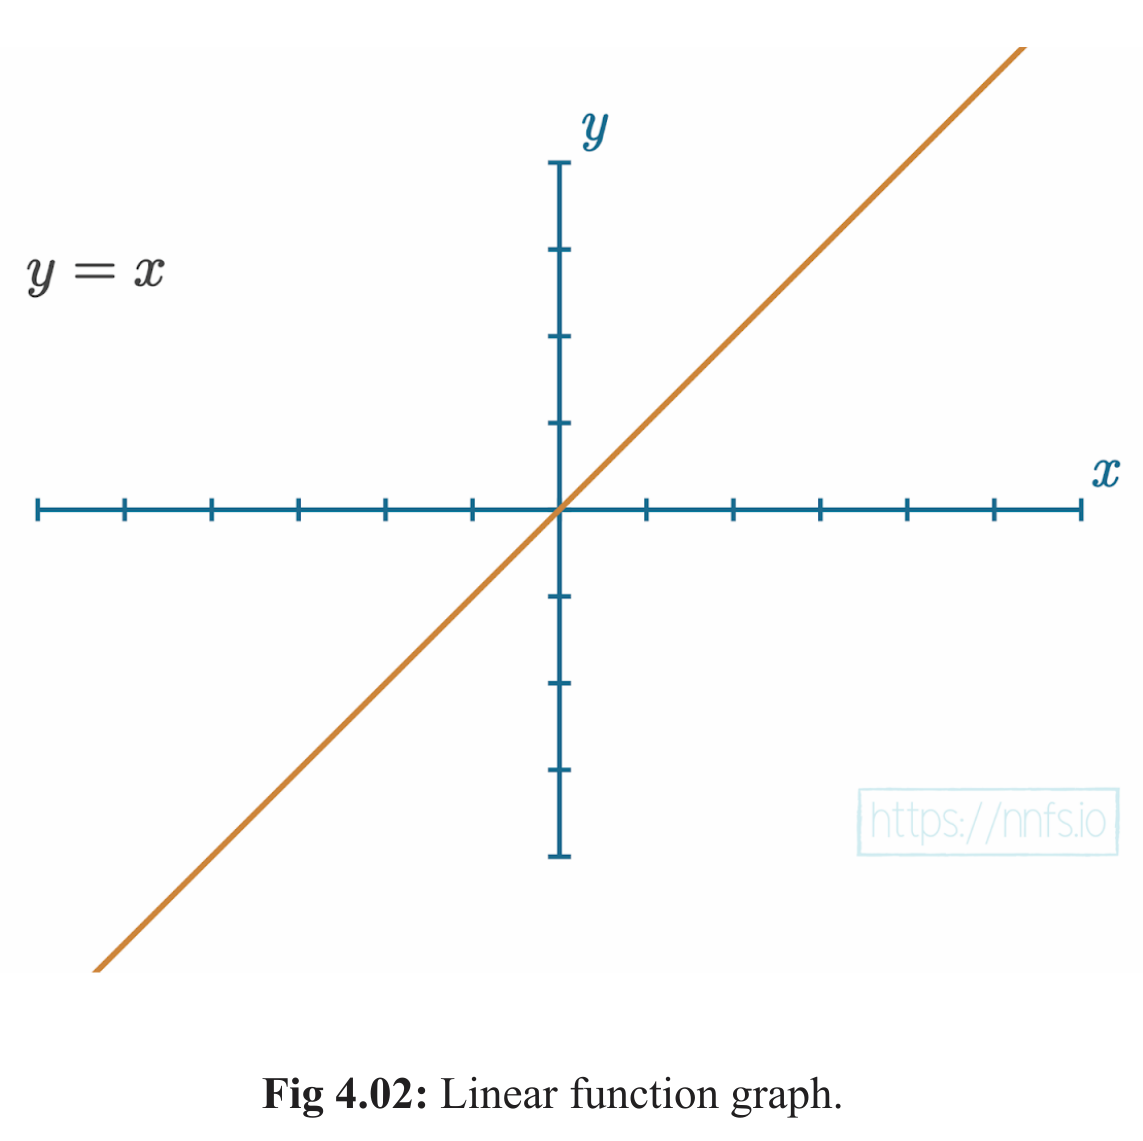

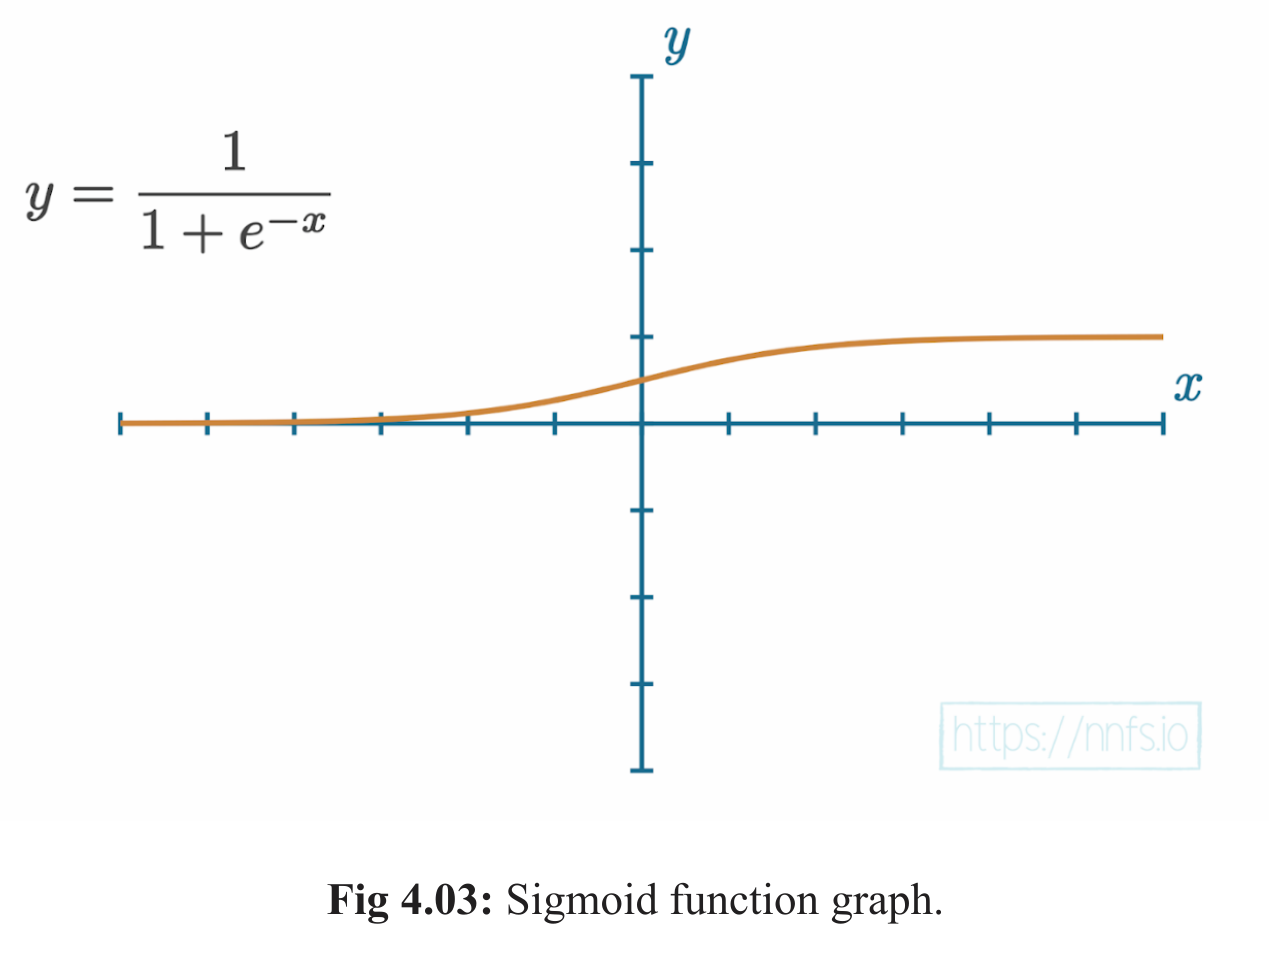

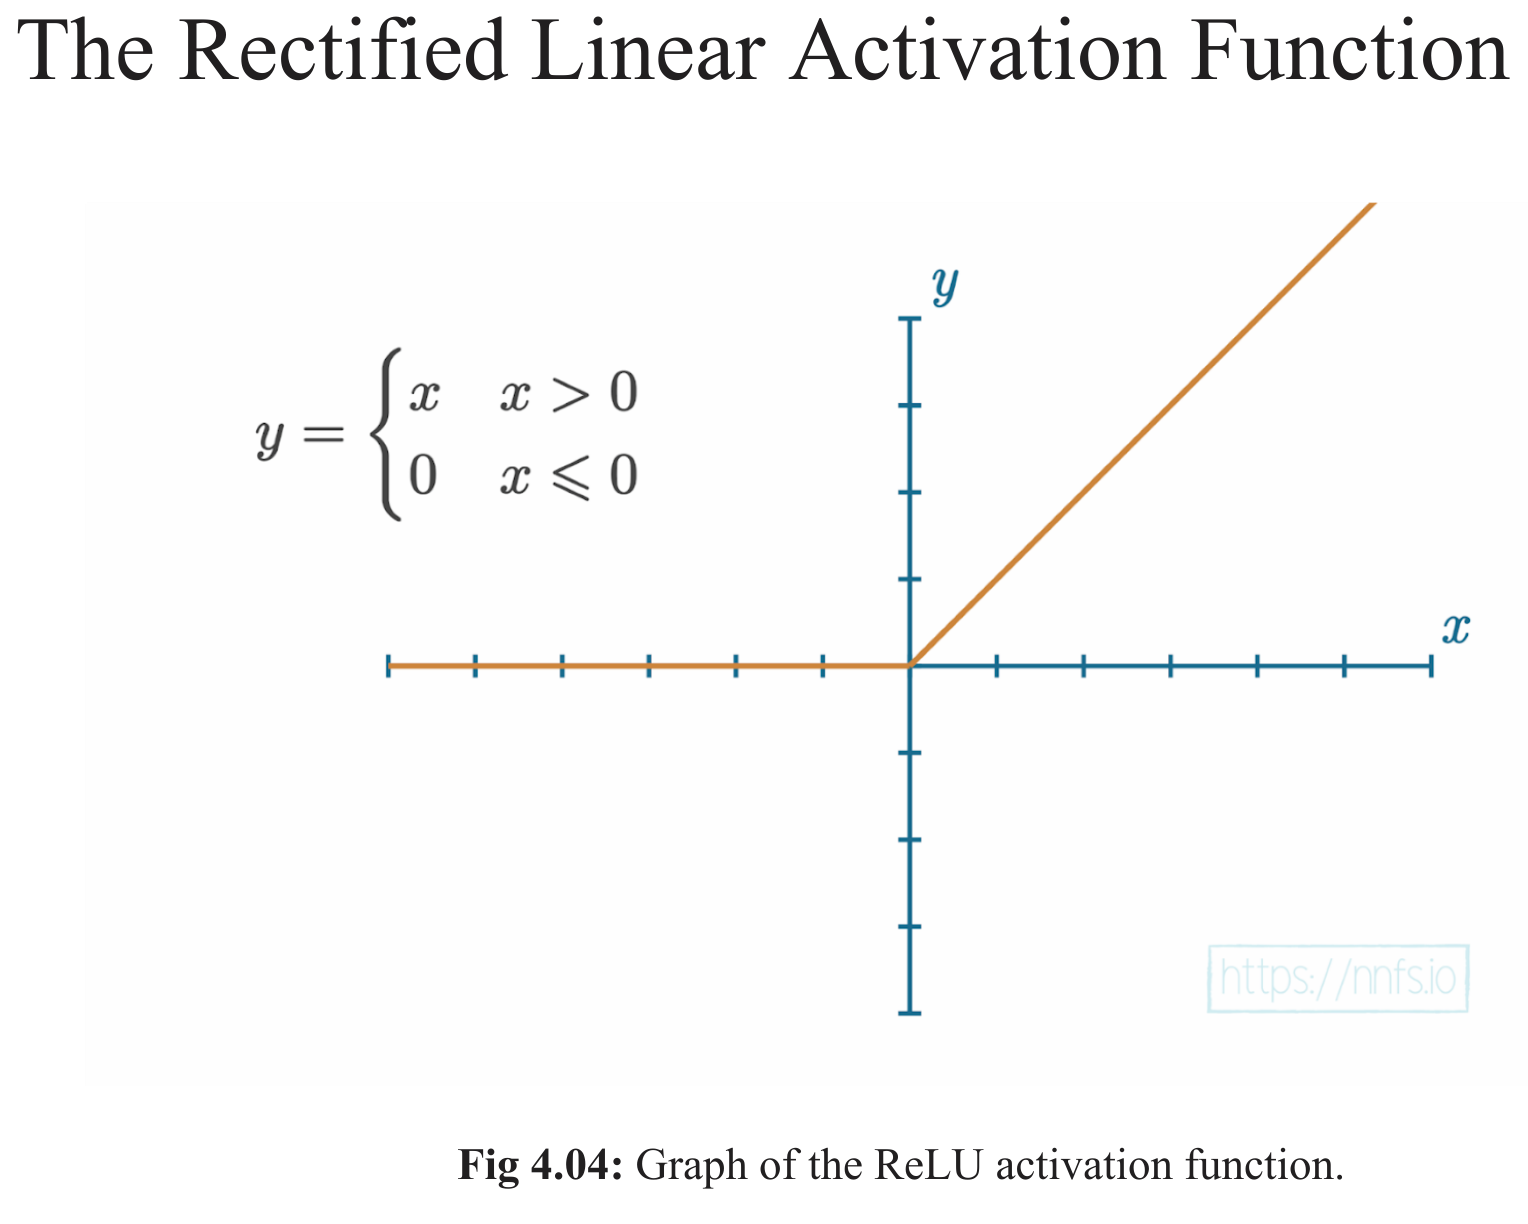

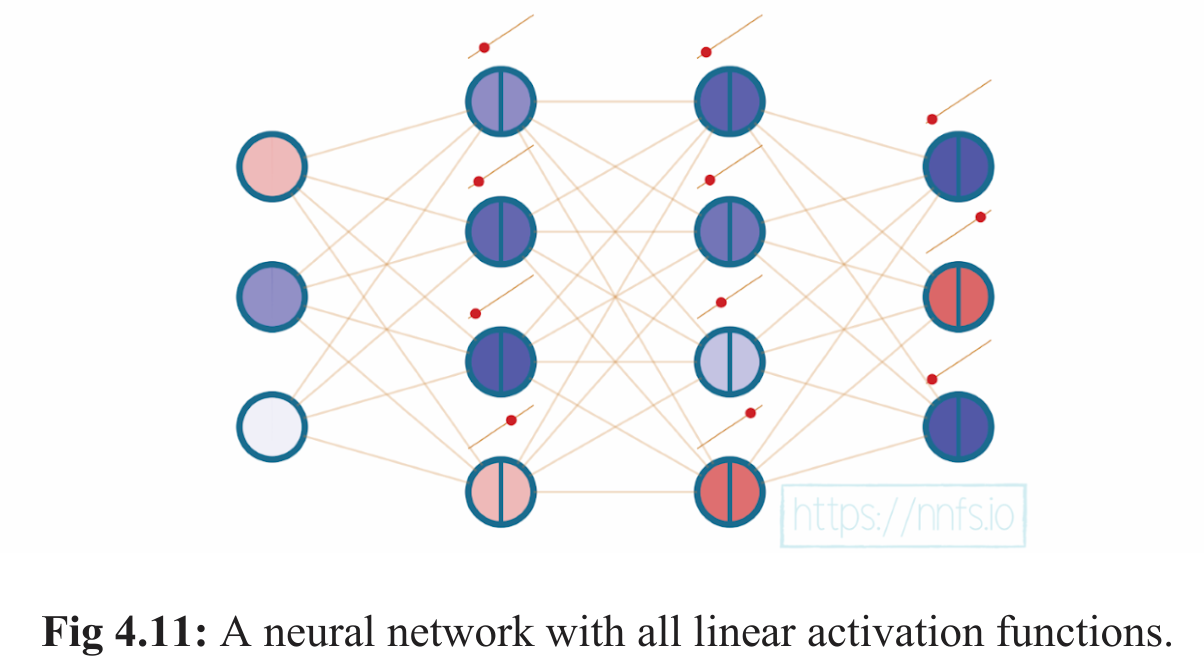

In [ ]:
def step_function(x):
    return np.where(x >= 0, 1, 0)

arr = np.array([3, 2, 1, 0, -1, -2, -3])

plt.grid(True)
plt.plot(arr, step_function(arr), 'ro-', label='input')    # 'bo--' for blue circle markers with dashed lines
# plt.plot(arr, 'bo--', label='input')
# plt.plot(step_function(np.array([3, 2, 1, 0, -1, -2, -3])), 'ro-', label='step function')
plt.legend()
plt.xlabel('Input Data')
plt.ylabel('Funcion Output')
plt.xticks(np.arange(-3, 4, 1))
plt.title('Step Function')
plt.show()


# step_function(np.array([3, 2, 1, 0, -1, -2, -3]))



In [15]:
np.random.randn(3, 4), np.random.randn(10)

(array([[-1.0452534 ,  1.2111453 ,  0.68981814,  1.3018463 ],
        [-0.6280876 , -0.48102713,  2.3039167 , -1.0600158 ],
        [-0.1359497 ,  1.1368914 ,  0.09772497,  0.5829537 ]],
       dtype=float32),
 array([-0.39944902,  0.37005588, -1.3065269 ,  1.6581306 , -0.11816405,
        -0.6801782 ,  0.6663831 , -0.4607198 , -1.3342584 , -1.3467175 ],
       dtype=float32))

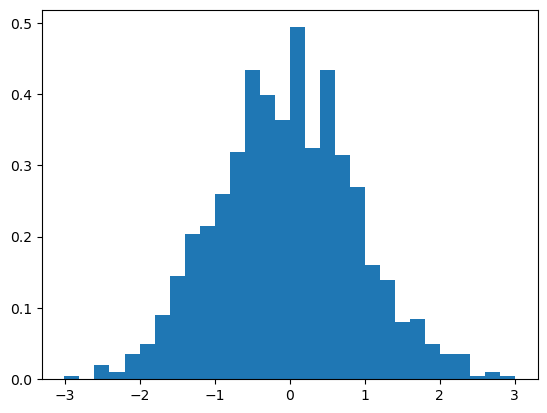

(-0.013436936, 0.99037546)

In [44]:
np.random.seed = 42
plt.hist(np.random.randn(1000), bins=30, density=True)
plt.autoscale()
plt.show()

np.random.randn(1000).mean(), np.random.randn(1000).std()

In [ ]:
serie = np.random.randn()